In [60]:
# Nama    : Taufik Kurahman Sasmita
# Nim.    : 1103200008
# Dataset : melb_data.csv
# ChatGpt : https://chat.openai.com/c/b40fd335-44d3-4a4d-b8c9-6b62682ade66

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


In [36]:

# Load data dari Google Drive
file_path = '/content/drive/MyDrive/Dataset/melb_data.csv'
data = pd.read_csv(file_path)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [40]:
# Menghilangkan nilai yang hilang
data_cleaned = data.dropna()

# Cetak informasi tentang DataFrame yang telah dibersihkan
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 15395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6196 non-null   int64  
 1   Suburb         6196 non-null   object 
 2   Address        6196 non-null   object 
 3   Rooms          6196 non-null   int64  
 4   Type           6196 non-null   object 
 5   Price          6196 non-null   float64
 6   Method         6196 non-null   object 
 7   SellerG        6196 non-null   object 
 8   Date           6196 non-null   object 
 9   Distance       6196 non-null   float64
 10  Postcode       6196 non-null   float64
 11  Bedroom2       6196 non-null   float64
 12  Bathroom       6196 non-null   float64
 13  Car            6196 non-null   float64
 14  Landsize       6196 non-null   float64
 15  BuildingArea   6196 non-null   float64
 16  YearBuilt      6196 non-null   float64
 17  CouncilArea    6196 non-null   object 
 18  Lattitude   

In [41]:
# Rekayasa fitur
# Misalnya, kita akan menghapus kolom yang memiliki nilai NaN
data = data.dropna(axis=0)

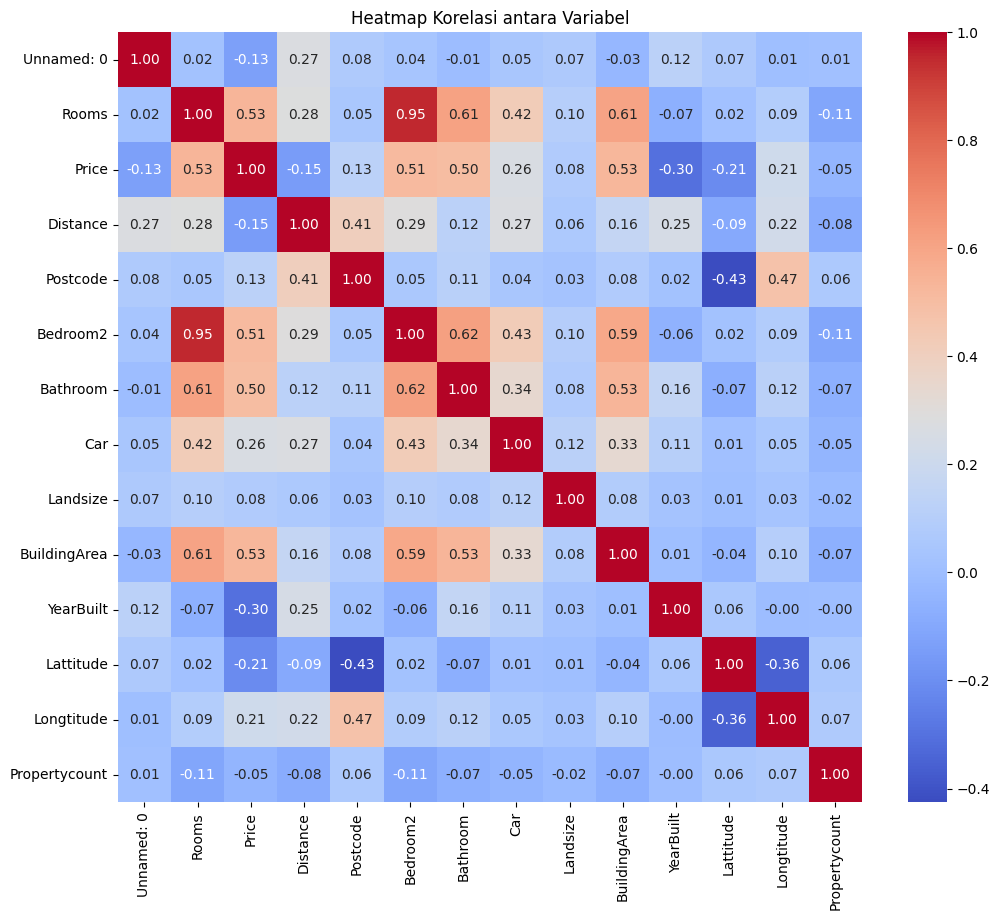

In [44]:
# Memilih hanya kolom-kolom numerik
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Menampilkan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Variabel')
plt.show()

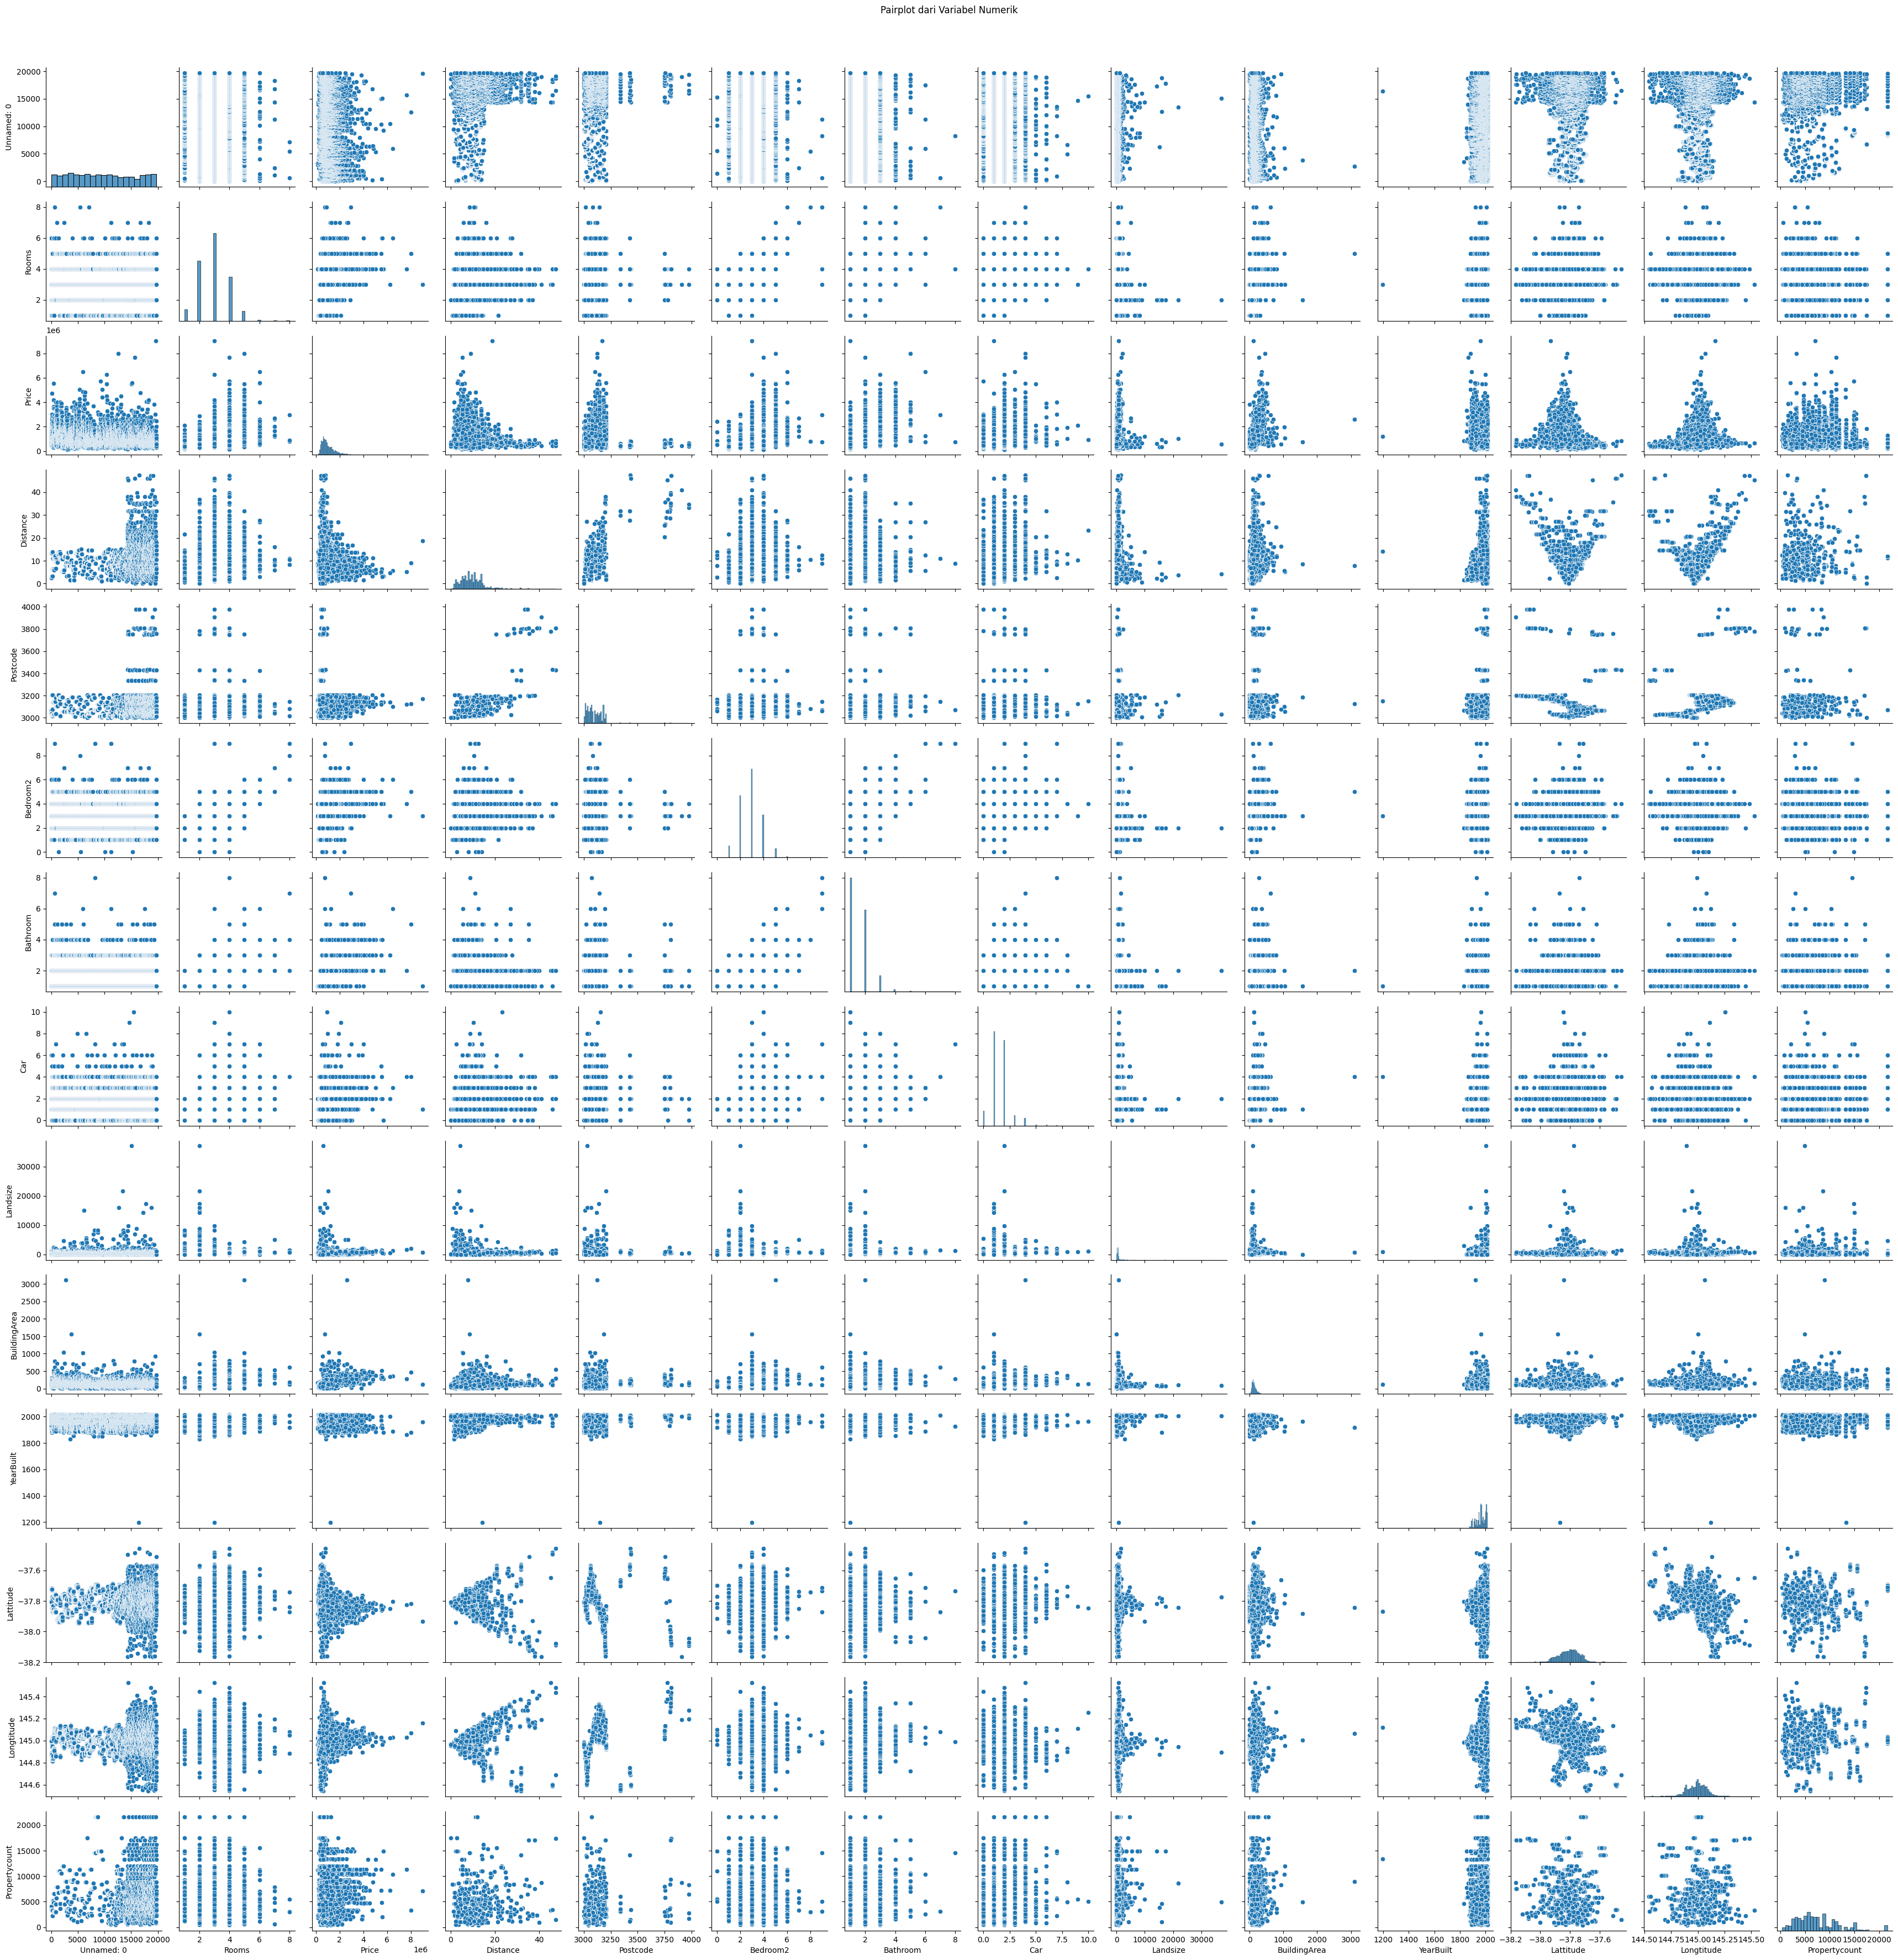

In [45]:
# Menampilkan pairplot
sns.pairplot(numeric_data)
plt.suptitle('Pairplot dari Variabel Numerik', y=1.02)
plt.show()

In [47]:
# Membagi data menjadi data pelatihan dan data pengujian (70% pelatihan, 30% pengujian)
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

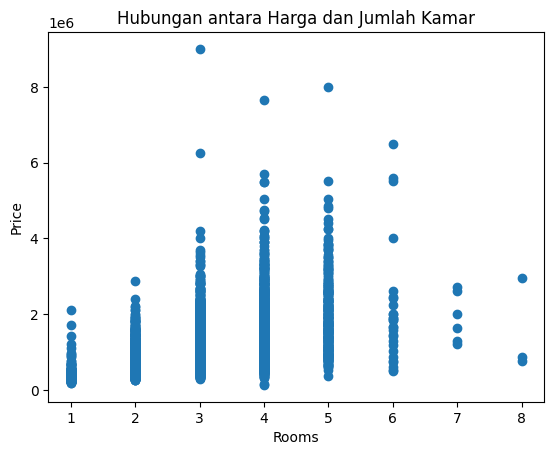

MAE XGBoost: 160100.03033384884
MAE Random Forest: 162428.04828940294
MAE Decision Tree: 223987.6707907477


In [58]:
# Rekayasa fitur
# Misalnya, kita akan menghapus kolom yang memiliki nilai NaN
data = data.dropna(axis=0)

# One-hot encoding untuk fitur non-numerik
data_encoded = pd.get_dummies(data)

# Memvisualisasikan data
# Misalnya, kita akan memvisualisasikan hubungan antara harga dan jumlah kamar tidur
plt.scatter(data['Rooms'], data['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Hubungan antara Harga dan Jumlah Kamar')
plt.show()

# Membagi data menjadi data pelatihan dan data pengujian (70% pelatihan, 30% pengujian)
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Latih model menggunakan XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Latih model menggunakan Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Latih model menggunakan Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Evaluasi menggunakan Mean Absolute Error (MAE)
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

print("MAE XGBoost:", xgb_mae)
print("MAE Random Forest:", rf_mae)
print("MAE Decision Tree:", dt_mae)